In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_style("white")

In [42]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230527_15_multitask_model/fold0/"

Segmentation score (dice) = 0.7329205453395844
Nodule-type score (balanced accuracy) = 0.6935874168179068
Malignancy score (auc) = 0.9442086112795633
Overall score = 0.8287312961791545


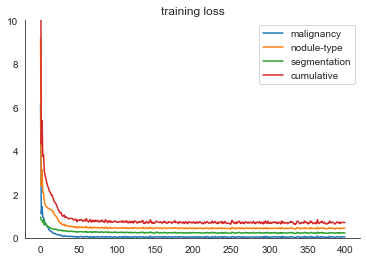

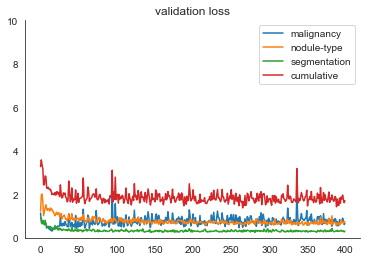

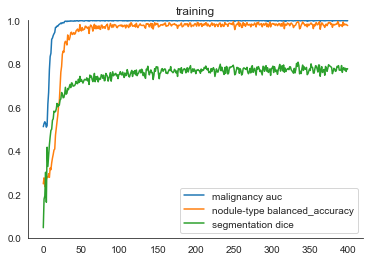

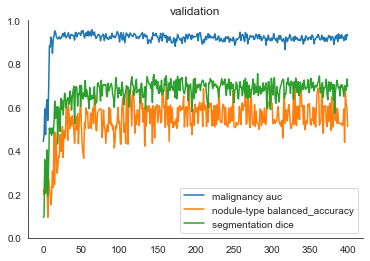

In [43]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [44]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230527_17_multitask_model/fold0/"

Segmentation score (dice) = 0.7457197904586792
Nodule-type score (balanced accuracy) = 0.7305656382335147
Malignancy score (auc) = 0.9161107742065898
Overall score = 0.8271267442763434


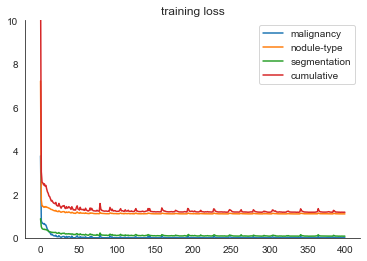

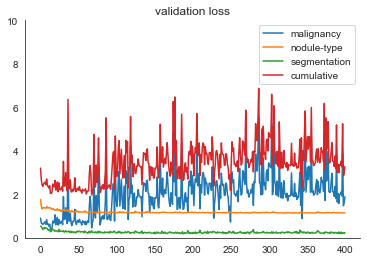

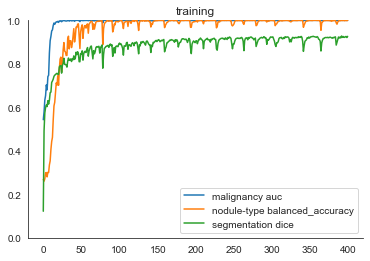

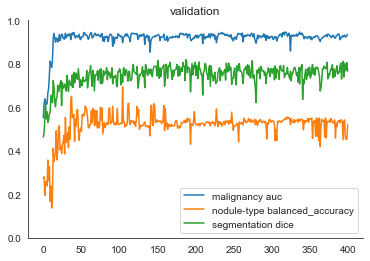

In [45]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [ ]:
labels = np.load(workspace / "results" / model_id / "labels.npy", allow_pickle=True).item()
predictions = np.load(workspace / "results" / model_id / "predictions.npy", allow_pickle=True).item()

In [ ]:
confusion_matrix(labels['malignancy'], predictions['malignancy'])

In [ ]:
confusion_matrix(labels['nodule-type'], predictions['nodule-type'])